### Pair VI
# Random Forest

In [1]:
# Tratamiento de datos
# ------------------------------------------------------------------------------
import numpy as np
import pandas as pd
from tqdm import tqdm

# Gráficos
# ------------------------------------------------------------------------------
import matplotlib.pyplot as plt
import seaborn as sns

# Modelado y evaluación
# ------------------------------------------------------------------------------
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn import tree
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score , cohen_kappa_score, roc_curve,roc_auc_score
from sklearn.model_selection import GridSearchCV

# Configuración warnings
# ------------------------------------------------------------------------------
import warnings
warnings.filterwarnings('ignore')

# Establecer la paleta de color de gráficas
# ==================================
qualitative_colors = sns.color_palette("Set2", 20)

# Para poder ver todas las columnas del dataframe
# ------------------------------------------------
pd.options.display.max_columns = None

Hasta ahora hemos ajustado el modelo usando una Regresión Logística, pero como hemos aprendido, podemos usar el Random Forest en este tipo de problemas. Los objetivos de este pair programming:
- Ajustad un modelo de Random Forest a nuestros datos.
- Calculad las métricas a nuestro nuevo modelo.
- Comparad las métricas con los modelos hechos hasta ahora. ¿Cuál es mejor?

In [2]:
df = pd.read_pickle("../data/metricas_outliers_sin_gestionar.pkl")
df.sample(2)

,satisfaccion,genero,cliente,viaje,clase,asiento,puntualidad,comida_bebida,puerta_embarque,wifi,entretenimiento,asistencia_linea,reserva_linea,serv_a_bordo,serv_habitaciones,gestion_equipaje,checkin,limpieza,embarque_linea,edad,distancia,retraso_salida
87563,0,1,0,1,1,3,5,5,5,1,2,2,3,3,4,3,2,3,4,0.434679,0.468879,-0.386481
128830,1,1,0,1,1,3,3,3,3,5,5,5,5,1,1,1,3,4,5,-1.020415,2.466714,0.060053


In [3]:
X1 = df.drop("satisfaccion", axis = 1)
y1 = df["satisfaccion"]

In [4]:

x_train, x_test, y_train, y_test = train_test_split(X1, y1, test_size = 0.2, random_state = 42)

In [5]:
param = {"max_depth": [37, 38, 39], 
        "max_features": [4, 5, 6],
        "min_samples_split": [10, 50],
        "min_samples_leaf": [10, 11],
        "n_estimators": [3]} 

In [6]:
gs_rf = GridSearchCV(
            estimator=RandomForestClassifier(random_state=42), 
            param_grid= param,
            cv=10, 
            verbose=1)

In [7]:
gs_rf.fit(x_train, y_train)

Fitting 10 folds for each of 36 candidates, totalling 360 fits


GridSearchCV(cv=10, estimator=RandomForestClassifier(random_state=42),
             param_grid={'max_depth': [37, 38, 39], 'max_features': [4, 5, 6],
                         'min_samples_leaf': [10, 11],
                         'min_samples_split': [10, 50], 'n_estimators': [3]},
             verbose=1)

In [8]:
bosque = gs_rf.best_estimator_
bosque

RandomForestClassifier(max_depth=37, max_features=6, min_samples_leaf=10,
                       min_samples_split=10, n_estimators=3, random_state=42)

  0%|          | 0/3 [00:00<?, ?it/s]

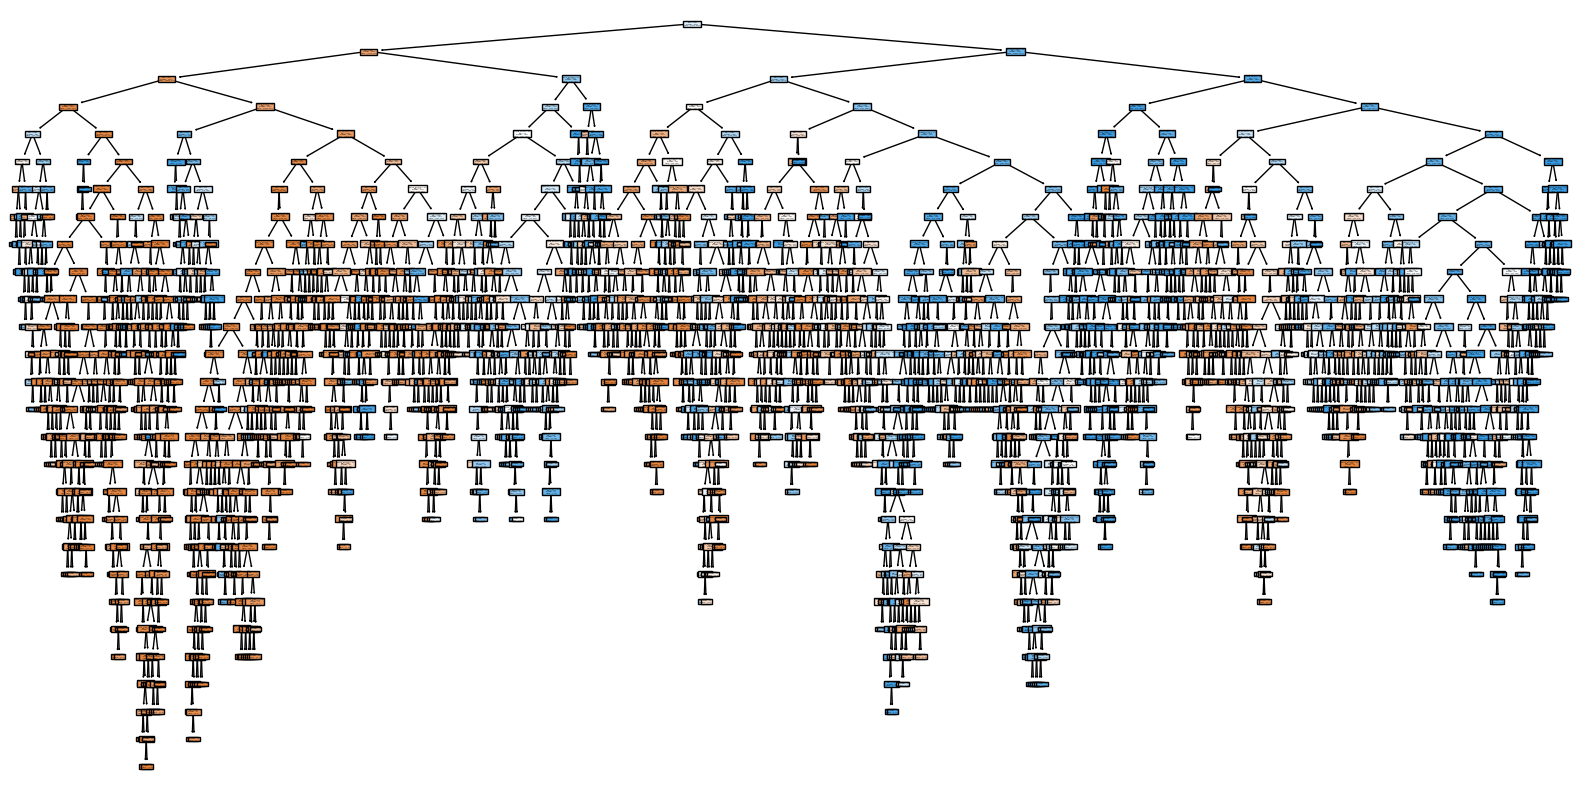

  0%|          | 0/3 [03:43<?, ?it/s]


In [10]:
for arbol in tqdm(bosque.estimators_):
    fig = plt.figure(figsize=(20, 10))
    tree.plot_tree(arbol, feature_names= list(x_train.columns), filled = True)
    plt.show()
    break

In [9]:
y_pred_test_rf = bosque.predict(x_test)
y_pred_train_rf = bosque.predict(x_train)

In [11]:
def metricas(clases_reales_test, clases_predichas_test, clases_reales_train, clases_predichas_train, modelo):
    
    # para el test
    accuracy_test = accuracy_score(clases_reales_test, clases_predichas_test)
    precision_test = precision_score(clases_reales_test, clases_predichas_test)
    recall_test = recall_score(clases_reales_test, clases_predichas_test)
    f1_test = f1_score(clases_reales_test, clases_predichas_test)
    kappa_test = cohen_kappa_score(clases_reales_test, clases_predichas_test)

    # para el train
    accuracy_train = accuracy_score(clases_reales_train, clases_predichas_train)
    precision_train = precision_score(clases_reales_train, clases_predichas_train)
    recall_train = recall_score(clases_reales_train, clases_predichas_train)
    f1_train = f1_score(clases_reales_train, clases_predichas_train)
    kappa_train = cohen_kappa_score(clases_reales_train, clases_predichas_train)
    

    
    df = pd.DataFrame({"accuracy": [accuracy_test, accuracy_train], 
                       "precision": [precision_test, precision_train],
                       "recall": [recall_test, recall_train], 
                       "f1": [f1_test, f1_train],
                       "kapppa": [kappa_test, kappa_train],
                       "set": ["test", "train"]})
    
    df["modelo"] = modelo
    return df

In [12]:
results_forest = metricas(y_test, y_pred_test_rf,y_train,  y_pred_train_rf, "Random Forest")
results_forest

,accuracy,precision,recall,f1,kapppa,set,modelo
0,0.943486,0.953752,0.943081,0.948386,0.885949,test,Random Forest
1,0.954583,0.963815,0.952664,0.958208,0.908481,train,Random Forest


In [13]:
results_tree = pd.read_pickle("../data/resultados_decision_tree_con_outliers.pkl")
results_tree

,accuracy,precision,recall,f1,kapppa,set,modelo
0,0.937943,0.944386,0.942801,0.943593,0.874628,test,Decission Tree Esta I
1,1.000000,1.000000,1.000000,1.000000,1.000000,train,Decission Tree Esta I
0,0.934555,0.947510,0.932802,0.940099,0.867989,test,Decision tree Esta II
1,0.950464,0.962806,0.945902,0.954279,0.900242,train,Decision tree Esta II
0,0.934555,0.947510,0.932802,0.940099,0.867989,test,Decision tree Esta III
1,0.950464,0.962806,0.945902,0.954279,0.900242,train,Decision tree Esta III


In [14]:
df_todos_resultados = pd.concat([results_forest, results_tree], axis = 0).reset_index(drop=True)
df_todos_resultados

,accuracy,precision,recall,f1,kapppa,set,modelo
0,0.943486,0.953752,0.943081,0.948386,0.885949,test,Random Forest
1,0.954583,0.963815,0.952664,0.958208,0.908481,train,Random Forest
2,0.937943,0.944386,0.942801,0.943593,0.874628,test,Decission Tree Esta I
3,1.000000,1.000000,1.000000,1.000000,1.000000,train,Decission Tree Esta I
4,0.934555,0.947510,0.932802,0.940099,0.867989,test,Decision tree Esta II
5,0.950464,0.962806,0.945902,0.954279,0.900242,train,Decision tree Esta II
6,0.934555,0.947510,0.932802,0.940099,0.867989,test,Decision tree Esta III
7,0.950464,0.962806,0.945902,0.954279,0.900242,train,Decision tree Esta III


In [15]:
df_todos_resultados.style.background_gradient(cmap="Set2")

,accuracy,precision,recall,f1,kapppa,set,modelo
0,0.943486,0.953752,0.943081,0.948386,0.885949,test,Random Forest
1,0.954583,0.963815,0.952664,0.958208,0.908481,train,Random Forest
2,0.937943,0.944386,0.942801,0.943593,0.874628,test,Decission Tree Esta I
3,1.000000,1.000000,1.000000,1.000000,1.000000,train,Decission Tree Esta I
4,0.934555,0.947510,0.932802,0.940099,0.867989,test,Decision tree Esta II
5,0.950464,0.962806,0.945902,0.954279,0.900242,train,Decision tree Esta II
6,0.934555,0.947510,0.932802,0.940099,0.867989,test,Decision tree Esta III
7,0.950464,0.962806,0.945902,0.954279,0.900242,train,Decision tree Esta III


In [16]:
importancia_predictores = pd.DataFrame(
                            {'predictor': x_train.columns,
                             'importancia': bosque.feature_importances_}
                            )


# ordenamos de mayor a menor los resultados
importancia_predictores.sort_values(by=["importancia"], ascending=False, inplace = True)

# printeamos los resultados
print("Importancia de los predictores en el modelo")
print("-------------------------------------------")
importancia_predictores

Importancia de los predictores en el modelo
-------------------------------------------


,predictor,importancia
9,entretenimiento,0.282741
4,asiento,0.159049
10,asistencia_linea,0.120030
13,serv_habitaciones,0.065784
6,comida_bebida,0.045860
11,reserva_linea,0.040974
1,cliente,0.036728
2,viaje,0.027771
0,genero,0.025110
5,puntualidad,0.024634


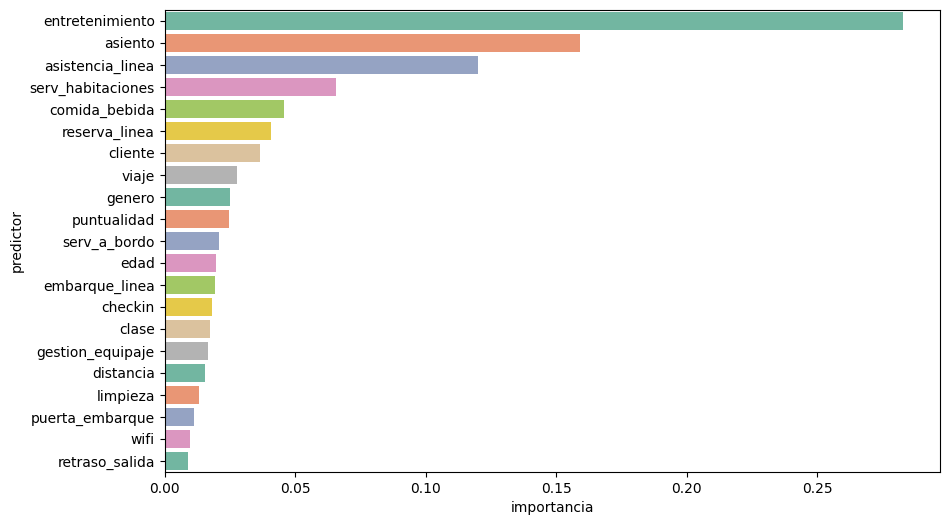

In [17]:
plt.figure(figsize=(10,6))
sns.barplot(x = "importancia", y = "predictor", data = importancia_predictores, palette= qualitative_colors);
plt.show()

In [18]:
df_todos_resultados.to_pickle("../data/df_todos_resultados_estand_con_outliers.pkl")